# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [3]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy.stats as stats

In [4]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [5]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values(by = 'Number of Discharges')

C:\Users\bbrocker\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


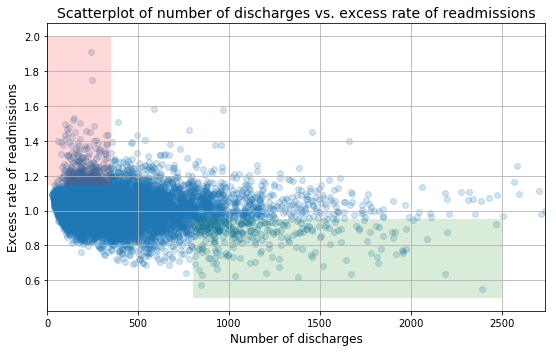

In [6]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [ ]:
# Your turn

## A. Do you agree with the above analysis and recommendations? Why or why not?
I do not agree with the above analysis and recommendations after looking at the plot. More indepth analysis should be done to reach conclusions that have statistical significance. 

### Hypotheses Testing
Null Hypothesis: The average Excess Readmission Ratio is the same for hospitals with less than 100 discharges, hospitals with more than 1000 dischargees, and all other hospitals.

Alternative Hypothesis: There are differences in the average Excess Readmission Ratio among the groups of hispitals.

Comparisons will be made using ANOVA. The three groups to be considered are hospitals with fewer than 100 discharges, hospitals with more than 1000 discharges, and all others.

In [11]:
# dataframes for each of the groups
df = clean_hospital_read_df[(clean_hospital_read_df['Excess Readmission Ratio'].notnull())]
low = df[(df['Number of Discharges'] < 100)]
high = df[(df['Number of Discharges'] > 1000)]
mid = df[(df['Number of Discharges'] <= 1000) & (df['Number of Discharges'] >= 100)]

In [12]:
# normality conditions
lowd = sorted(low['Excess Readmission Ratio'])
highd = sorted(high['Excess Readmission Ratio'])
midd = sorted(mid['Excess Readmission Ratio'])

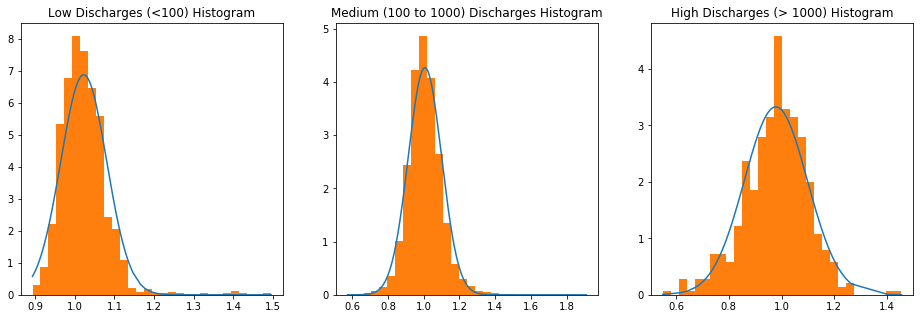

In [13]:
#Plotting to check normality for each subpopulation

fig = plt.figure(figsize=(16,5))

ax1 = fig.add_subplot(1,3,1)
mu_low = np.average(lowd)
sigma_low = np.std(lowd)
fit = stats.norm.pdf(lowd, mu_low, sigma_low)
ax1.plot(lowd, fit)
ax1.hist(lowd, 30, normed=True)
ax1.set_title("Low Discharges (<100) Histogram")

ax2 = fig.add_subplot(1,3,2)
mu_mid = np.average(midd)
sigma_mid = np.std(midd)
fit = stats.norm.pdf(midd, mu_mid, sigma_mid)
ax2.plot(midd, fit)
ax2.hist(midd, 30, normed=True)
ax2.set_title("Medium (100 to 1000) Discharges Histogram")

ax3 = fig.add_subplot(1,3,3)
mu_high = np.average(highd)
sigma_high= np.std(highd)
fit = stats.norm.pdf(highd, mu_high, sigma_high)
ax3.plot(highd, fit)
ax3.hist(highd, 30, normed=True)
ax3.set_title("High Discharges (> 1000) Histogram")

The data appears normally distributed in all three cases. And the three subpopulations are independent because they are all different hospitals. Therefore, we can apply ANOVA to check for a significant differences.

In [16]:
#ANOVA test
f_statistic, p_value = stats.f_oneway(lowd, highd, midd)
print('f value : ', f_statistic)
print('p value : ', p_value)

f value :  39.6402382815
p value :  6.9782900901e-18


The p-value from the test is well below our threshold. This implies that we can reject the null hypothesis that the difference in means of excess readmission ratios among the three subpopulations is significant.

### Construct another plot that conveys the same information in a more direct manner.

In [14]:
log_x = np.log10(x)
mean_x = np.average(log_x)
var_x = np.var(log_x)
mean_y = np.average(y)
slope = (np.cov(log_x, y)[0][1]) / var_x
inter = mean_y - slope * mean_x

Regression line slope:  -0.0266290578432


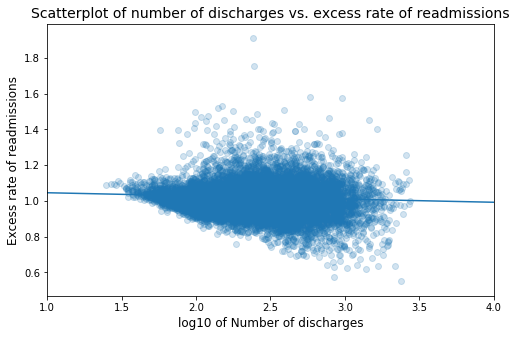

In [15]:
reg_line_x = [1, 4]
reg_line_y = [inter + slope, inter + slope*3]

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(np.log10(x), y,alpha=0.2)
ax.plot(reg_line_x, reg_line_y)
ax.set_xlim(1,4)
ax.set_xlabel('log10 of Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)
print("Regression line slope: ", slope)